## Inflation Rate Forecasting with ARIMA

            Inflation
Month                
2005-01-01        7.3
2005-02-01        7.3
2005-03-01        7.1
2005-04-01        7.2
2005-05-01        7.3
            Inflation
Month                
2024-08-01        3.3
2024-09-01        1.9
2024-10-01        2.3
2024-11-01        2.5
2024-12-01        2.9


<Axes: xlabel='Month', ylabel='Inflation Rate (%)'>

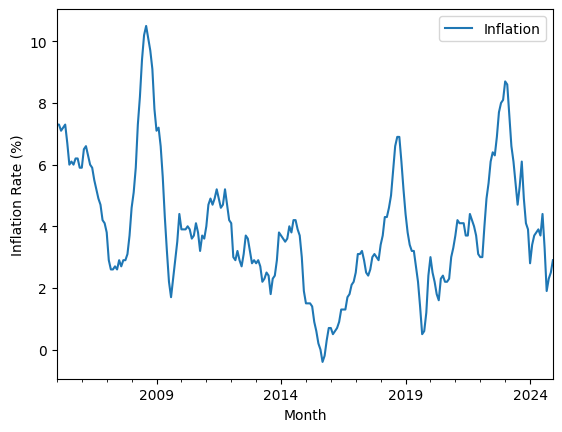

In [138]:
import pandas as pd

df = pd.read_csv("inflation.csv", index_col="Month", parse_dates=True)
# Use 2005-2024
df = df.iloc[12*(2005-1958):]
print(df.head())
print(df.tail())
df.plot(xlabel="Month", ylabel="Inflation Rate (%)")

<Axes: xlabel='Date (Monthly)', ylabel='Inflation Rate (%)'>

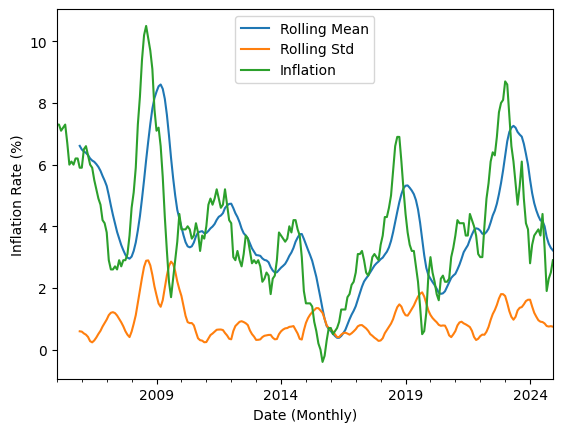

In [139]:
import matplotlib.pyplot  as plt
df["Inflation"].rolling(12).mean().plot(label="Rolling Mean", legend=True)
df["Inflation"].rolling(12).std().plot(label="Rolling Std", legend=True)
df["Inflation"].plot(label="Inflation", xlabel="Date (Monthly)", ylabel="Inflation Rate (%)", legend=True)


In [140]:
n = int(len(df) - 12)
train = df.iloc[0:n]
test = df.iloc[n:len(df)]
print(f"Total: {len(df)}, Train: {len(train)}, Test: {len(test)}")

Total: 240, Train: 228, Test: 12


## Stationary Test using ADF

In [141]:
from statsmodels.tsa.stattools import adfuller

p = adfuller(train["Inflation"])[1]
is_stationary = p < 0.05
print(f"The p-value: {p:.7f} < 0.05 ({is_stationary})" )

The p-value: 0.0392802 < 0.05 (True)


## Plotting ACF/PACF

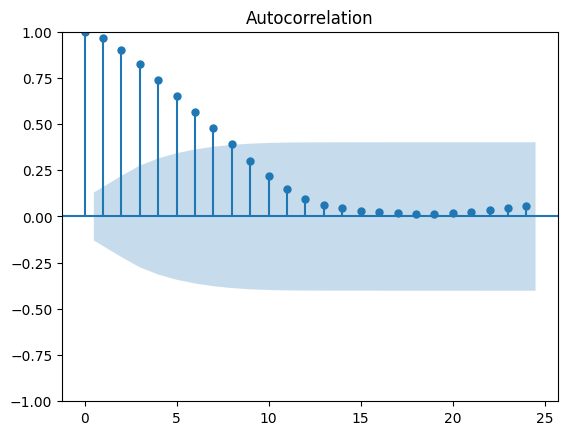

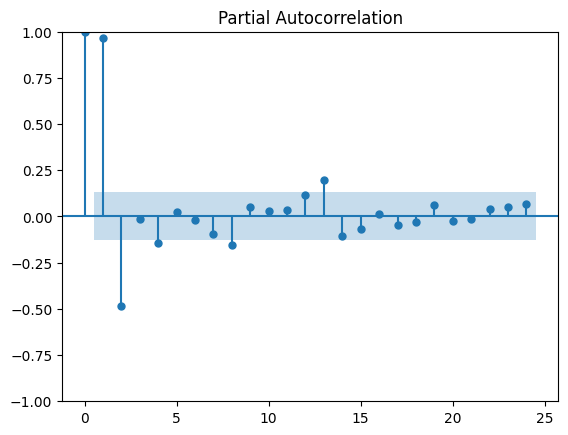

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_ = plot_acf(train["Inflation"])
_ = plot_pacf(train["Inflation"])

Trying possible combinations of AR, MA significant terms from the plots above.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
possible_ar = [1,2,3,8,13]
possible_ma = [1,2,3,4,5,6,7]


results = []

print(f"Trying {len(possible_ar) * len(possible_ma)} combinations.")
for ar in possible_ar:
    for ma in possible_ma:
        model = ARIMA(train["Inflation"], order=(ar,0,ma), freq="MS").fit()
        model_text = f"ARIMA({ar}, 0, {ma})"
        results.append((model_text, model.aic, model.bic, ar, ma))

Trying 35 combinations.


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\L

Sorting by BIC to avoid overfitting.

In [144]:
results = pd.DataFrame(results, columns=["Model", "AIC", "BIC", "AR", "MA"]).sort_values("BIC")
results

,Model,AIC,BIC,AR,MA
18,"ARIMA(3, 0, 5)",225.397574,259.691030,3,5
13,"ARIMA(2, 0, 7)",222.315466,260.038268,2,7
14,"ARIMA(3, 0, 1)",239.982357,260.558431,3,1
2,"ARIMA(1, 0, 3)",241.069616,261.645690,1,3
19,"ARIMA(3, 0, 6)",224.001442,261.724244,3,6
8,"ARIMA(2, 0, 2)",241.155930,261.732003,2,2
7,"ARIMA(2, 0, 1)",246.898518,264.045246,2,1
20,"ARIMA(3, 0, 7)",223.177409,264.329556,3,7
15,"ARIMA(3, 0, 2)",240.721352,264.726771,3,2
0,"ARIMA(1, 0, 1)",251.320912,265.038295,1,1


Using AUTO_ARIMA package for confirmation

In [145]:
from pmdarima import auto_arima


auto_arima(train["Inflation"], stationary=True, suppress_warnings=True,)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

### Comparing the MSE of the top 3 ARIMA models based on BIC

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\App

,Model,MSE,BIC
2,"ARIMA(3, 0, 1)",0.858137,260.558431
0,"ARIMA(3, 0, 5)",0.891869,259.691030
1,"ARIMA(2, 0, 7)",1.638765,260.038268


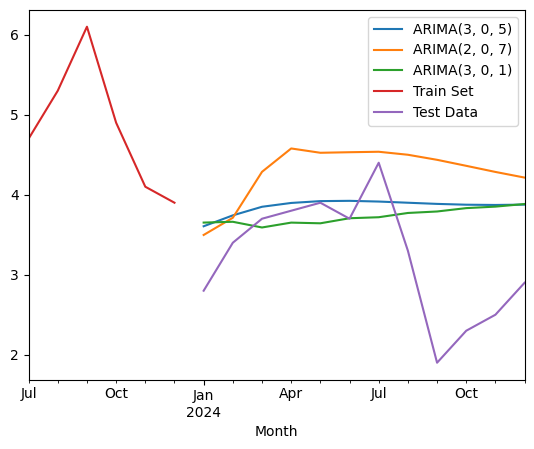

In [146]:
from sklearn.metrics import mean_squared_error as MSE

model_results = []
for mod in results.iloc[:3].itertuples():
    model = ARIMA(train["Inflation"], order=(mod.AR, 0, mod.MA), freq="MS").fit()
    forecast = model.forecast(len(test))
    forecast.rename(mod.Model).plot(legend=True)
    model_results.append( (
        mod.Model, MSE(test["Inflation"], forecast), model.bic
    ))

train["Inflation"].iloc[-6:].plot(legend=True, label="Train Set")
test["Inflation"].plot(legend=True, label="Test Data")
pd.DataFrame(model_results, columns=["Model", "MSE", "BIC"]).sort_values("MSE")

## Forecasting 2025

Using the whole data set and order (3,0,1)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

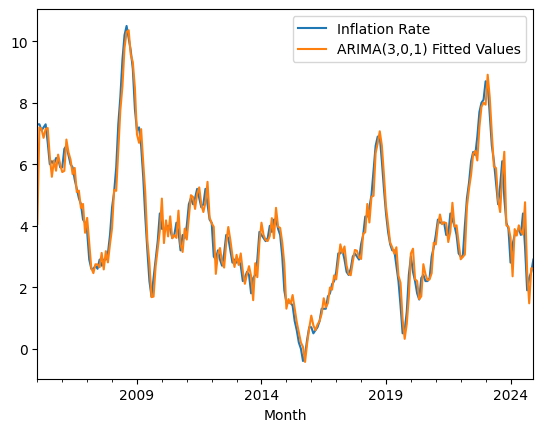

In [147]:
model = ARIMA(df["Inflation"], order=(3,0,1), freq="MS").fit()

#Compare fitted & actual 

df["Inflation"].plot(legend=True, label="Inflation Rate")
model.fittedvalues.plot(legend=True, label="ARIMA(3,0,1) Fitted Values")

<Axes: xlabel='Date (Monthly)', ylabel='Inflation Rate (%)'>

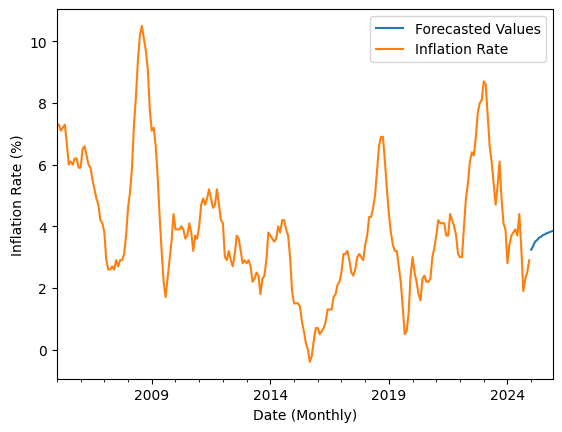

In [148]:
model.forecast(len(test)).plot(legend=True, label="Forecasted Values")
df["Inflation"].plot(legend=True, label="Inflation Rate", xlabel="Date (Monthly)", ylabel="Inflation Rate (%)")